Credit Card Fault Detection via Anomaly Detection (Machine Learning)
1. Introduction
In this project, several anomaly detection techniques of sklearn package have been explored to train a machince learning model to detect credict card fraud. Methods such as Local outlier factor and isolation forest algorithm was used to calculate the anomaly scores. These algorithms use a dataset of slightly under 30000 credit card transactions to predict a fradualent transaction.

Before, proceeding with the project, an attempt to briefly describe the anomaly detection and the detection techniques would be made.

What is Anomaly detection?

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

Anomalies can be broadly categorized as: Point anomalies: A single instance of data is anomalous if it's too far off from the rest. Business use case- Detecting credit card fraud based on "amount spent."

Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data. Business use case- Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.

Collective anomalies: A set of data instances collectively helps in detecting anomalies. Business use case- Someone is trying to copy data form a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack.

What are the various methods of anomaly detection?

Simple Statistical Methods The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles. Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. Traversing mean over time-series data isn't exactly trivial, as it's not static. You would need a rolling window to compute the average across the data points. Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

Anomaly Detection Techniques:

Simple Statistical Methods- Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean.

Machine Learning-Based Approaches- Density-Based Anomaly Detection-: These include the k-nearest neighbors algorithm, Relative density of data based method known as local outlier factor (LOF) algorithm Clustering-Based Anomaly Detection-: K-means algorithm Support Vector Machine-Based Anomaly Detection Isolation Forest Algorithm

What is Local Outlier Factor algorithm?

LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

What is Isolation forest algorithm?

Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.


In [10]:

#2. Data Importing and Visualization
#The data has been downloaded as a csv file from the kaggle website and imported into pandas dataframes as follows:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn

ccdata = pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\creditcard.csv')
print(ccdata.columns)
print(ccdata.shape)
print(ccdata.describe)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -

Observing from the above columns information of the credit card dataframe created we can observe that about 31 parameters are available for about 280000 credit card transactions. The data obtained in this dataset was as a result of Principle Component Analysis (PCA) for dimensionality reduction performed in order to protect the sensitive information prevalent in the original dataset. The Class column indicates 0 for valid transaction and 1 for fraudulent transaction.

Now to look visually at the data, histogram plot of each parameter could be plotted and observations were made.


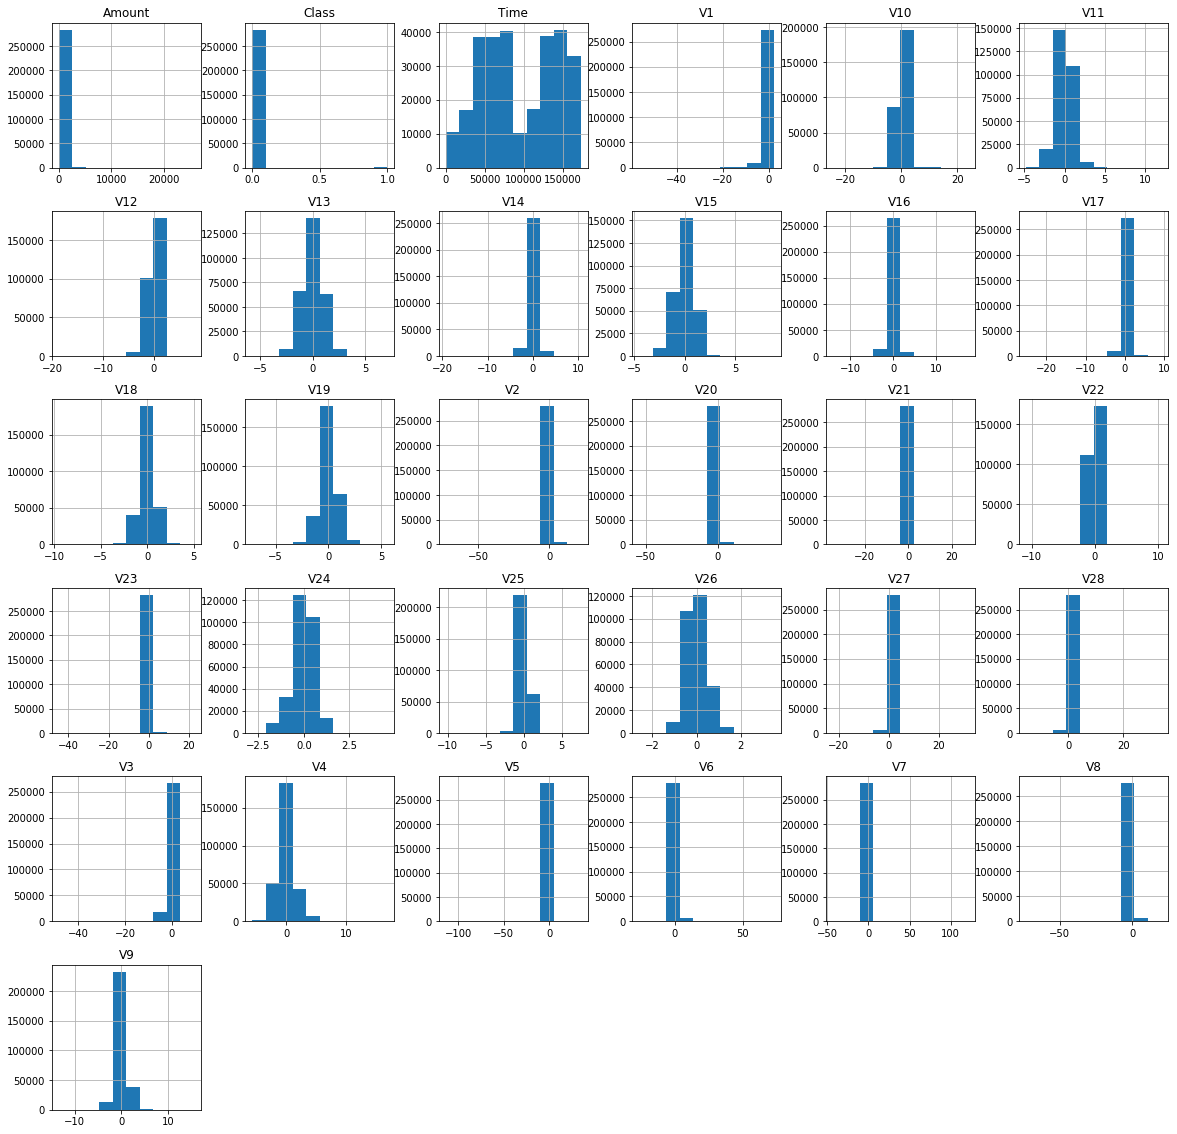

In [11]:
# Visually plotting histogram
ccdata.hist(figsize=(20,20))
plt.show()

Observing the histograms, few observations could be made:

Most of the V parameters are found to be clustered around 0 with some V's showing fairly large outliers and some showing no outliers at all.
When it comes to the class feature, it can be seen that a very small minority of transactions are actually fraudulent which does makes sense. However, the actual number or fraction of fradulent transactions needs to be determined.


In [12]:
count_fraud_trans = ccdata['Class'][ccdata['Class'] == 1].count()
count_valid_trans = ccdata['Class'][ccdata['Class'] == 0].count()
percent_outlier = count_fraud_trans/(count_valid_trans)

print('Fradulent Transaction:',count_fraud_trans)
print('Valid Transactions:',count_valid_trans)
print('Percentage outlier: ', percent_outlier)

Fradulent Transaction: 492
Valid Transactions: 284315
Percentage outlier:  0.0017304750013189597


Thus, less than 0.2 of the credit card transactions were actually fund to be fradulent.

To further observe if there is any sort of correlation between the various parameters of the dataset, a correlation matrix could be built. This matrix gives a great idea of whether there is any strong correlation or no correlation (i.e. could be removed) or if there is any semblance of linear correlation.


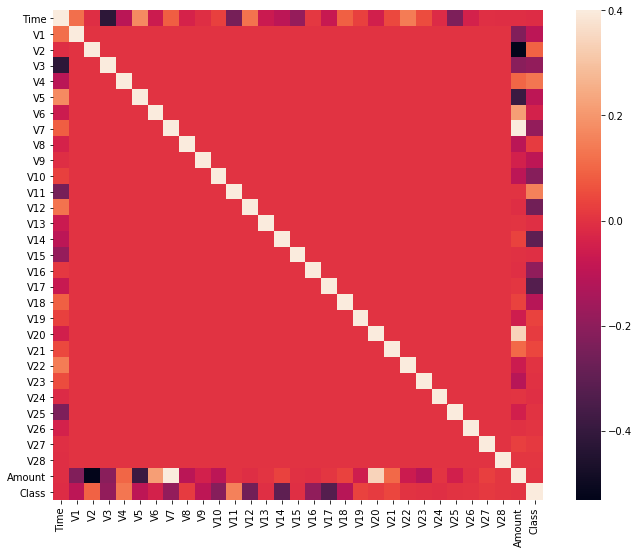

In [13]:
# Correlation matrix
import seaborn as sns
correlation_matrix = ccdata.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(correlation_matrix,vmax = 0.4, square = True)
plt.show()


Thus, from the correlation matrix heat map above, most of the V parameters do not have any correlation with each other. However, parameters V1 to V18 show pretty strong correlation with the class parameter and all remaining parameters show nearly no correlation with the class column. Also, some V parameters show strong positive correlation and some others show strong negative correlation.

So, the question now arises whether the V parameters not having strong correlation with the Class parameter influences the machine learning model or not. So in this project, both possibilities of training the model with all the V parameters and also with only V parameters from V1 to V18 were entured.

3. Data Preparation and ML Algorithm training
In order to prepare the data for the machine learning models, the data is filtered and split into following subsets: A subset containing all the V parameters except for Class, a subset containing only those V parameters which have a strong correlation with the Class label and the subset coontaining the Claass column.
Then the isolation forest model and the local outlier factor algorithm were chosen and fit to both the input parameters subsets in sequence.
 Splitting the data set into training set ==> all the parameters (or only correlating parameters) 
 i.e. the training and testing set, and  the evaluating column Class.

 To extract columns from  the datframe.


In [14]:
columns = ccdata.columns.tolist()

# Filtering the columns as required
# 1. All V parameters and excluding class
columns_V_all = [c for c in columns if c not in ["Class"]]

# 2. Some V parameters which are correlating with Class and excluding class and  amount columns
columns_V_part = [c for c in columns_V_all if c not in ["Class", "Amount", "V22","V23", "V24", "V25", "V26", "V27", "V28"]]


In [ ]:
#3 Evaluating colunmn Class
col_eval = ccdata["Class"]
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


X_types = [columns_V_all, columns_V_part]

for x in  X_types:
    
    models = {"LOF": LocalOutlierFactor(n_neighbors= 20,  contamination = percent_outlier),
          "IsF": IsolationForest(max_samples = len(ccdata[x]),  contamination = percent_outlier, random_state = 1)}
    print(len(x))
    keys = list(models.keys())
    
    if  keys[0]=="LOF":
        mod_name = "LOF"
        model = models.get("LOF")
        Y_pred = model.fit_predict(ccdata[x])
        scores_pred = model.negative_outlier_factor_
         ## The  prediction value for these models by default give -1 and +1 which needs to be changed to 0 and  1
        Y_pred[Y_pred == 1] =0
        Y_pred[Y_pred == -1] =1    
        error_count = (Y_pred != col_eval).sum()
        # Printing the metrics for the classification algorithms
        print('{}: Number  of errors {}'.format(mod_name, error_count))
        print("accuracy score: ", accuracy_score(col_eval,Y_pred))
        print(classification_report(col_eval,Y_pred))
        
        
    if keys[1] =="IsF":
        mod_name = "IsF"
        model = models.get("IsF")
        model.fit(ccdata[x])
        scores_pred = model.decision_function(ccdata[x])
        Y_pred = model.predict(ccdata[x])
        ## The  prediction value for these models by default give -1 and +1 which needs to be changed to 0 and  1
        Y_pred[Y_pred == 1] =0
        Y_pred[Y_pred == -1] =1
        error_count = (Y_pred != col_eval).sum()        
        # Printing the metrics for the classification algorithms
        print('{}: Number  of errors {}'.format(mod_name, error_count))
        print("accuracy score: ", accuracy_score(col_eval,Y_pred))
        print(classification_report(col_eval,Y_pred))
         

            
models = {"LOF": LocalOutlierFactor(n_neighbors= 20,  contamination = percent_outlier),
          "IsF": IsolationForest(max_samples = len(ccdata[x]),  contamination = percent_outlier, random_state = 1)}

K =  list(models.keys())
print(K)
['LOF', 'IsF']


30
LOF: Number  of errors 935
accuracy score:  0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



4. Conclusion
A The accuracy scores for both the models are seen to be about 99.7% which is extremely high which implies that the model is performing with high accuracy. However, from the number of errors in the predictions sfor both the models seem high too implying the contrary. This is because majority population of the transactions are valid thereby making the accuracy which is the sum of both true positives and true negatives over the total data points, a biased metric. In such cases, precision and the F1 score give a better measure of the performance of a model. Thus, in case of the model using all the V parameters the precision of Local Outlier Factors algorithm is obly about 5 % precise where as the Isolation Forest algorithm showed about 34%. While 30% precise model is not a great model but of the two models isolation forest model performs the best.

Also, by reducing the dimensionality of the V parameters a marked increase in precision was observed at 14 % for the Local Outlier Factor algorithm and about 39% precise. Thus, a further increase in the precision of the models could be obtained by doing some feature engineering.

Some other ML models could be investigated.
